In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping


rootPath = '/content/drive/MyDrive/프로젝트 데이터2'

# ImageDataGenerator 설정
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.2, 1.3],
    horizontal_flip=True,
    validation_split=.2
)

# 훈련 데이터 생성
trainGen = imageGenerator.flow_from_directory(
    rootPath,
    target_size=(224, 224),
    subset='training',
    batch_size=32
)

# 검증 데이터 생성
validationGen = imageGenerator.flow_from_directory(
    rootPath,
    target_size=(224, 224),
    subset='validation',
    batch_size=32
)

# 클래스별 이미지 수 확인
print("Class Ai:", len(os.listdir(os.path.join(rootPath, 'Ai'))))
print("Class 인간:", len(os.listdir(os.path.join(rootPath, '인간'))))

# 생성된 데이터 확인
print("Training Data:")
for data_batch, labels_batch in trainGen:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

print("\nValidation Data:")
for data_batch, labels_batch in validationGen:
    print("Data batch shape:", data_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    break

Found 208 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Class Ai: 129
Class 인간: 129
Training Data:
Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 2)

Validation Data:
Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 2)


In [ ]:
model = Sequential()

model.add(layers.InputLayer(input_shape=(224, 224, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 112, 112, 16)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 56, 56, 32)       

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc'],
)

epochs = 200
history = model.fit(
    trainGen,
    epochs=epochs,
    validation_data=validationGen,
    callbacks=[early_stopping]  # 여기에 EarlyStopping 콜백을 전달합니다.
)



Epoch 1/200
7/7 [==============================] - 13s 1s/step - loss: 1.5309 - acc: 0.5000 - val_loss: 0.6935 - val_acc: 0.4800
Epoch 2/200
7/7 [==============================] - 8s 1s/step - loss: 0.7006 - acc: 0.5000 - val_loss: 0.6929 - val_acc: 0.5200
Epoch 3/200
7/7 [==============================] - 7s 1s/step - loss: 0.6921 - acc: 0.5000 - val_loss: 0.6929 - val_acc: 0.5200
Epoch 4/200
7/7 [==============================] - 9s 1s/step - loss: 0.6934 - acc: 0.5048 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 5/200
7/7 [==============================] - 7s 1s/step - loss: 0.6930 - acc: 0.5240 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 6/200
7/7 [==============================] - 10s 1s/step - loss: 0.6930 - acc: 0.5240 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 7/200
7/7 [==============================] - 7s 1s/step - loss: 0.6925 - acc: 0.5481 - val_loss: 0.6935 - val_acc: 0.4600
Epoch 8/200
7/7 [==============================] - 9s 2s/step - loss: 0.6924 - acc: 0.5240 - val_loss:

In [ ]:
model.save('/content/drive/MyDrive/프로젝트 데이터.h5')

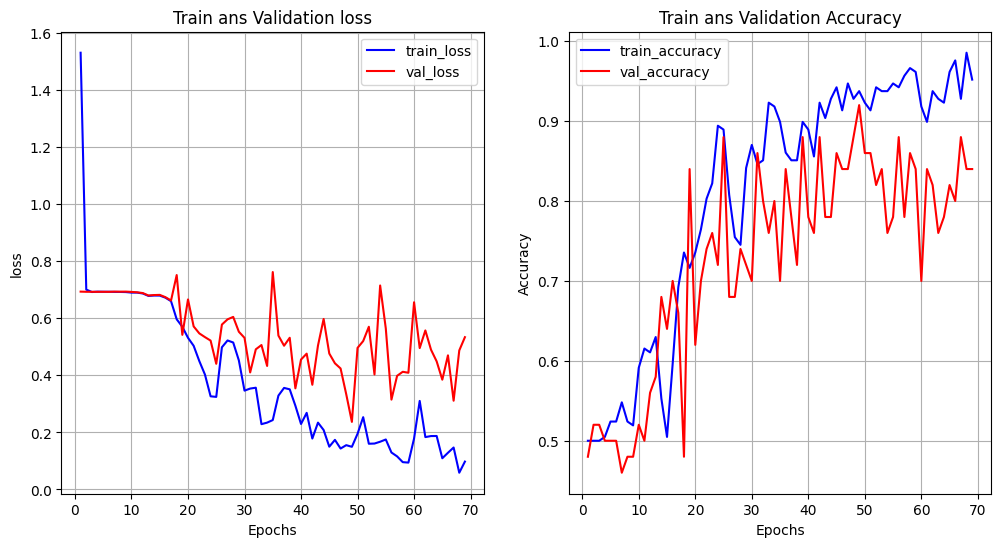

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train ans Validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train ans Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, '/content/drive/MyDrive/프로젝트 데이터2'),
    target_size=(224, 224),
)

model.evaluate(testGen)

Found 258 images belonging to 2 classes.
9/9 [==============================] - 9s 946ms/step - loss: 0.2252 - acc: 0.9147


[0.22518877685070038, 0.9147287011146545]

In [ ]:
index = ['보정', '무보정']

1/1 [==============================] - 0s 17ms/step
예측: 보정
정답: 보정


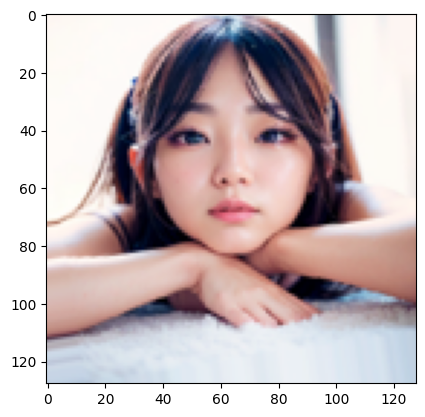

In [ ]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)

predictions = model.predict(arr.reshape(1, 224, 224, 3))
predicted_class = np.argmax(predictions)

print('예측: {}'.format(index[predicted_class]))
print('정답: {}'.format(index[np.argmax(imgs[1][0])]))

1/1 [==============================] - 0s 18ms/step


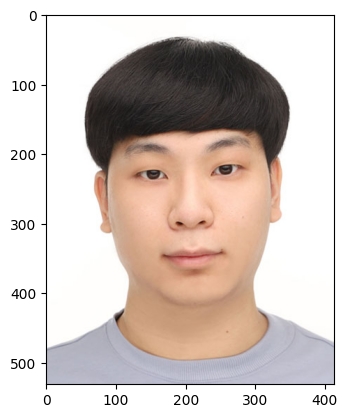

예측: 무보정


In [ ]:
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # [0, 1]로 재조정

    return img_array

# 테스트할 이미지의 파일 경로 설정
image_path = '/content/drive/MyDrive/프로젝트 데이터2/인간/남자2.png'

# 이미지 로딩 및 전처리
test_image = load_and_preprocess_image(image_path)

# 예측 수행
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

# 이미지 출력
img = load_img(image_path)
plt.imshow(img)
plt.show()

# 예측 결과 출력
index = ['보정', '무보정']
print('예측: {}'.format(index[predicted_class]))